<a href="https://colab.research.google.com/github/AnasBakr/Deep_Learning_Projects/blob/main/computer_vision_dog_vs_cat_classification_using_Transfer_Learning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>



---


Extracting Dataset using Kaggle API

In [1]:
!pip install kaggle

In [2]:
# configuring the path of Kaggle.json file
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json



---


Importing the Dataset from Kaggle

https://www.kaggle.com/c/dogs-vs-cats/overview

In [3]:
# Kaggle api
!kaggle competitions download -c dogs-vs-cats

 98% 796M/812M [00:07<00:00, 184MB/s]
100% 812M/812M [00:07<00:00, 112MB/s]


In [4]:
!ls

dogs-vs-cats.zip  kaggle.json  sample_data


In [5]:
# extracting the compressed dataset
from zipfile import ZipFile

dataset = '/content/dogs-vs-cats.zip'

with ZipFile(dataset, 'r') as zip:
  zip.extractall()
  print('The dataset is extracted')

The dataset is extracted


In [6]:
# extracting the compressed dataset
from zipfile import ZipFile

dataset = '/content/train.zip'

with ZipFile(dataset, 'r') as zip:
  zip.extractall()
  print('The dataset is extracted')

The dataset is extracted


In [7]:
import os
# counting the number of files in train folder
path, dirs, files = next(os.walk('/content/train'))
file_count = len(files)
print('Number of images: ', file_count)

Number of images:  25000




---


Printing the name of images

In [8]:
file_names = os.listdir('/content/train/')
print(file_names)

['cat.11679.jpg', 'dog.4125.jpg', 'cat.2598.jpg', 'cat.9846.jpg', 'dog.2876.jpg', 'cat.10578.jpg', 'cat.693.jpg', 'cat.3887.jpg', 'cat.10498.jpg', 'dog.2600.jpg', 'cat.2017.jpg', 'cat.697.jpg', 'cat.5264.jpg', 'dog.10004.jpg', 'dog.3753.jpg', 'dog.5054.jpg', 'dog.2366.jpg', 'cat.1235.jpg', 'cat.257.jpg', 'dog.9842.jpg', 'dog.1862.jpg', 'dog.5364.jpg', 'cat.5815.jpg', 'dog.6580.jpg', 'cat.4754.jpg', 'cat.1759.jpg', 'cat.4343.jpg', 'dog.10982.jpg', 'dog.10163.jpg', 'cat.11777.jpg', 'cat.11874.jpg', 'cat.11649.jpg', 'cat.3049.jpg', 'dog.2492.jpg', 'cat.12447.jpg', 'cat.5825.jpg', 'cat.6710.jpg', 'dog.7040.jpg', 'dog.6783.jpg', 'cat.2318.jpg', 'cat.4183.jpg', 'dog.9561.jpg', 'dog.6421.jpg', 'dog.3260.jpg', 'cat.3697.jpg', 'dog.2890.jpg', 'dog.2304.jpg', 'cat.7604.jpg', 'cat.9429.jpg', 'dog.6655.jpg', 'dog.3220.jpg', 'dog.1006.jpg', 'cat.1611.jpg', 'cat.12030.jpg', 'dog.10195.jpg', 'cat.11960.jpg', 'cat.10355.jpg', 'cat.4185.jpg', 'dog.8113.jpg', 'dog.5900.jpg', 'cat.5054.jpg', 'dog.7257.jp



---


Importing the Dependencies

In [9]:
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from sklearn.model_selection import train_test_split
from google.colab.patches import cv2_imshow



---
Displaying the images of dogs and cats


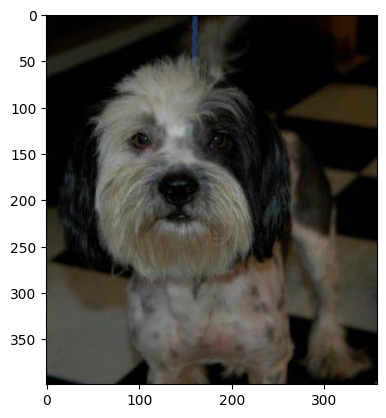

In [31]:
# display dog image
img = mpimg.imread('/content/train/dog.5740.jpg')
imgplt = plt.imshow(img)
plt.show()

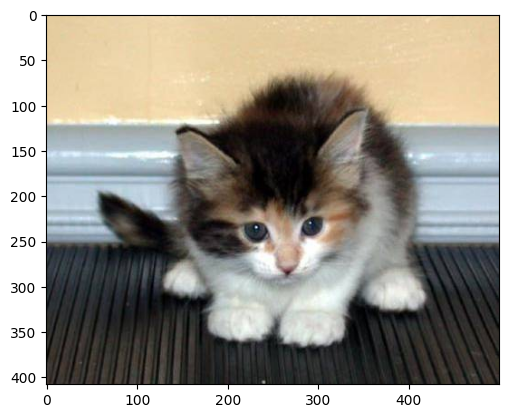

In [21]:
# display cat image
img = mpimg.imread('/content/train/cat.11679.jpg')
imgplt = plt.imshow(img)
plt.show()

In [12]:
file_names = os.listdir('/content/train/')

for i in range(5):

  name = file_names[i]
  print(name[0:3])

cat
dog
cat
cat
dog


In [13]:
file_names = os.listdir('/content/train/')

dog_count = 0
cat_count = 0

for img_file in file_names:

  name = img_file[0:3]

  if name == 'dog':
    dog_count += 1

  else:
    cat_count += 1

print('Number of dog images =', dog_count)
print('Number of cat images =', cat_count)

Number of dog images = 12500
Number of cat images = 12500




---


Resizing all the images

In [14]:
#creating a directory for resized images
os.mkdir('/content/image resized')

In [18]:
original_folder = '/content/train/'
resized_folder = '/content/image resized/'

for i in range(2000):

  filename = os.listdir(original_folder)[i]
  img_path = original_folder+filename

  img = Image.open(img_path)
  img = img.resize((224, 224))
  img = img.convert('RGB')

  newImgPath = resized_folder+filename
  img.save(newImgPath)

In [20]:
file_names = os.listdir('/content/image resized/')
print(file_names)

['cat.11679.jpg', 'dog.4125.jpg', 'cat.2598.jpg', 'cat.9846.jpg', 'dog.2876.jpg', 'cat.10578.jpg', 'cat.693.jpg', 'cat.3887.jpg', 'cat.10498.jpg', 'dog.2600.jpg', 'cat.2017.jpg', 'cat.697.jpg', 'cat.5264.jpg', 'dog.10004.jpg', 'dog.3753.jpg', 'dog.5054.jpg', 'dog.2366.jpg', 'cat.1235.jpg', 'cat.257.jpg', 'dog.9842.jpg', 'dog.1862.jpg', 'dog.5364.jpg', 'cat.5815.jpg', 'dog.6580.jpg', 'cat.4754.jpg', 'cat.1759.jpg', 'cat.4343.jpg', 'dog.10982.jpg', 'dog.10163.jpg', 'cat.11777.jpg', 'cat.11874.jpg', 'cat.11649.jpg', 'cat.3049.jpg', 'dog.2492.jpg', 'cat.12447.jpg', 'cat.5825.jpg', 'cat.6710.jpg', 'dog.7040.jpg', 'dog.6783.jpg', 'cat.2318.jpg', 'cat.4183.jpg', 'dog.9561.jpg', 'dog.6421.jpg', 'dog.3260.jpg', 'cat.3697.jpg', 'dog.2890.jpg', 'dog.2304.jpg', 'cat.7604.jpg', 'cat.9429.jpg', 'dog.6655.jpg', 'dog.3220.jpg', 'dog.1006.jpg', 'cat.1611.jpg', 'cat.12030.jpg', 'dog.10195.jpg', 'cat.11960.jpg', 'cat.10355.jpg', 'cat.4185.jpg', 'dog.8113.jpg', 'dog.5900.jpg', 'cat.5054.jpg', 'dog.7257.jp

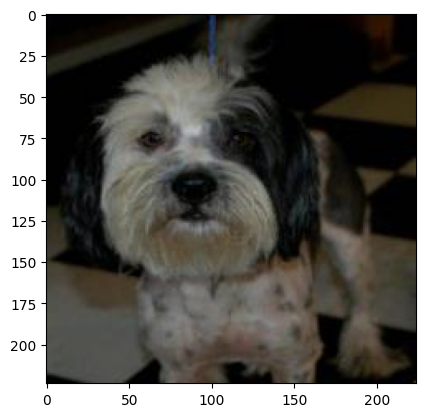

In [30]:
# display resized dog image
img = mpimg.imread('/content/image resized/dog.5740.jpg')
imgplt = plt.imshow(img)
plt.show()

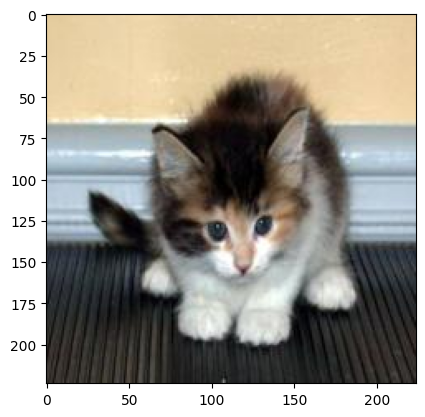

In [22]:
# display resized cat image
img = mpimg.imread('/content/image resized/cat.11679.jpg')
imgplt = plt.imshow(img)
plt.show()



---

**Creating labels for resized images of dogs and cats**

Cat --> 0

Dog --> 1

In [32]:
# creaing a for loop to assign labels
filenames = os.listdir('/content/image resized/')


labels = []

for i in range(2000):

  file_name = filenames[i]
  label = file_name[0:3]

  if label == 'dog':
    labels.append(1)

  else:
    labels.append(0)

In [33]:
print(filenames[0:5])
print(len(filenames))

['cat.11679.jpg', 'dog.4125.jpg', 'cat.2598.jpg', 'cat.9846.jpg', 'dog.2876.jpg']
2000


In [34]:
print(labels[0:5])
print(len(labels))

[0, 1, 0, 0, 1]
2000


In [35]:
# counting the images of dogs and cats out of 2000 images
values, counts = np.unique(labels, return_counts=True)
print(values)
print(counts)

[0 1]
[ 998 1002]




---

Converting all the resized images to numpy arrays

In [36]:
import cv2
import glob

In [37]:
image_directory = '/content/image resized/'
image_extension = ['png', 'jpg']

files = []

[files.extend(glob.glob(image_directory + '*.' + e)) for e in image_extension]

dog_cat_images = np.asarray([cv2.imread(file) for file in files])

In [38]:
print(dog_cat_images)

[[[[157 203 227]
   [157 203 227]
   [157 203 227]
   ...
   [159 202 229]
   [159 202 229]
   [159 202 229]]

  [[157 203 227]
   [157 203 227]
   [157 203 227]
   ...
   [160 203 230]
   [160 203 230]
   [160 203 230]]

  [[157 203 227]
   [157 203 227]
   [157 203 227]
   ...
   [162 205 232]
   [162 205 232]
   [162 205 232]]

  ...

  [[ 51  55  60]
   [ 45  49  54]
   [ 38  42  47]
   ...
   [ 23  26  30]
   [ 23  26  30]
   [ 42  45  49]]

  [[ 53  57  62]
   [ 36  40  45]
   [ 44  48  53]
   ...
   [ 34  37  41]
   [ 17  20  24]
   [ 33  36  40]]

  [[ 55  59  64]
   [ 31  35  40]
   [ 49  53  58]
   ...
   [ 42  45  49]
   [ 14  17  21]
   [ 28  31  35]]]


 [[[ 88  79  82]
   [ 88  79  82]
   [ 88  79  82]
   ...
   [120 108  96]
   [122 110  98]
   [124 112 100]]

  [[ 87  78  81]
   [ 87  78  81]
   [ 87  78  81]
   ...
   [120 108  96]
   [121 109  97]
   [122 110  98]]

  [[ 86  77  80]
   [ 86  77  80]
   [ 86  77  80]
   ...
   [120 108  96]
   [120 108  96]
   [120 108

In [39]:
type(dog_cat_images)

numpy.ndarray

In [40]:
print(dog_cat_images.shape)

(2000, 224, 224, 3)


In [41]:
x = dog_cat_images
y = np.asarray(labels)



---

**Train Test Split**

In [42]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=2)

In [43]:
print(x.shape, x_train.shape, x_test.shape)

(2000, 224, 224, 3) (1600, 224, 224, 3) (400, 224, 224, 3)




1600 --> training images

400 --> test images


In [44]:
# scaling the data
x_train_scaled = x_train/255

x_test_scaled = x_test/255

In [45]:
print(x_train_scaled)

[[[[0.61960784 0.65098039 0.65098039]
   [0.62352941 0.65490196 0.65490196]
   [0.62745098 0.65882353 0.65882353]
   ...
   [0.6        0.60784314 0.60784314]
   [0.59607843 0.60392157 0.60392157]
   [0.59215686 0.6        0.6       ]]

  [[0.61960784 0.65098039 0.65098039]
   [0.62352941 0.65490196 0.65490196]
   [0.62745098 0.65882353 0.65882353]
   ...
   [0.6        0.60784314 0.60784314]
   [0.6        0.60784314 0.60784314]
   [0.6        0.60784314 0.60784314]]

  [[0.61960784 0.65098039 0.65098039]
   [0.62352941 0.65490196 0.65490196]
   [0.62745098 0.65882353 0.65882353]
   ...
   [0.60392157 0.61176471 0.61176471]
   [0.60784314 0.61568627 0.61568627]
   [0.61176471 0.61960784 0.61960784]]

  ...

  [[0.15294118 0.2        0.27058824]
   [0.17254902 0.21960784 0.29019608]
   [0.17647059 0.22352941 0.29411765]
   ...
   [0.79215686 0.81176471 0.80784314]
   [0.76078431 0.78431373 0.78039216]
   [0.79607843 0.81960784 0.81568627]]

  [[0.17647059 0.21960784 0.29803922]
   [0.2



---
Building the Neural Network


In [46]:
import tensorflow as tf
import tensorflow_hub as hub

In [47]:
mobilenet_model = 'https://tfhub.dev/google/tf2-preview/mobilenet_v2/feature_vector/4'

pretrained_model = hub.KerasLayer(mobilenet_model, input_shape=(224,224,3), trainable=False)

In [48]:
num_of_classes = 2

model = tf.keras.Sequential([

    pretrained_model,
    tf.keras.layers.Dense(num_of_classes)

])

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 keras_layer (KerasLayer)    (None, 1280)              2257984   
                                                                 
 dense (Dense)               (None, 2)                 2562      
                                                                 
Total params: 2260546 (8.62 MB)
Trainable params: 2562 (10.01 KB)
Non-trainable params: 2257984 (8.61 MB)
_________________________________________________________________


In [49]:
model.compile(
    optimizer = 'adam',
    loss = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
    metrics = ['acc']
)

In [50]:
model.fit(x_train_scaled, y_train, epochs=5)

Epoch 1/5
50/50 [==============================] - 87s 2s/step - loss: 0.2291 - acc: 0.9100
Epoch 2/5
50/50 [==============================] - 73s 1s/step - loss: 0.0805 - acc: 0.9744
Epoch 3/5
50/50 [==============================] - 80s 2s/step - loss: 0.0570 - acc: 0.9787
Epoch 4/5
50/50 [==============================] - 82s 2s/step - loss: 0.0463 - acc: 0.9837
Epoch 5/5
50/50 [==============================] - 75s 1s/step - loss: 0.0349 - acc: 0.9919


In [51]:
score, acc = model.evaluate(x_test_scaled, y_test)
print('Test Loss =', score)
print('Test Accuracy =', acc)

13/13 [==============================] - 17s 1s/step - loss: 0.0729 - acc: 0.9775
Test Loss = 0.07287213206291199
Test Accuracy = 0.9775000214576721




---

**Predictive System**

Path of the image to be predicted: /content/dog1.jpg


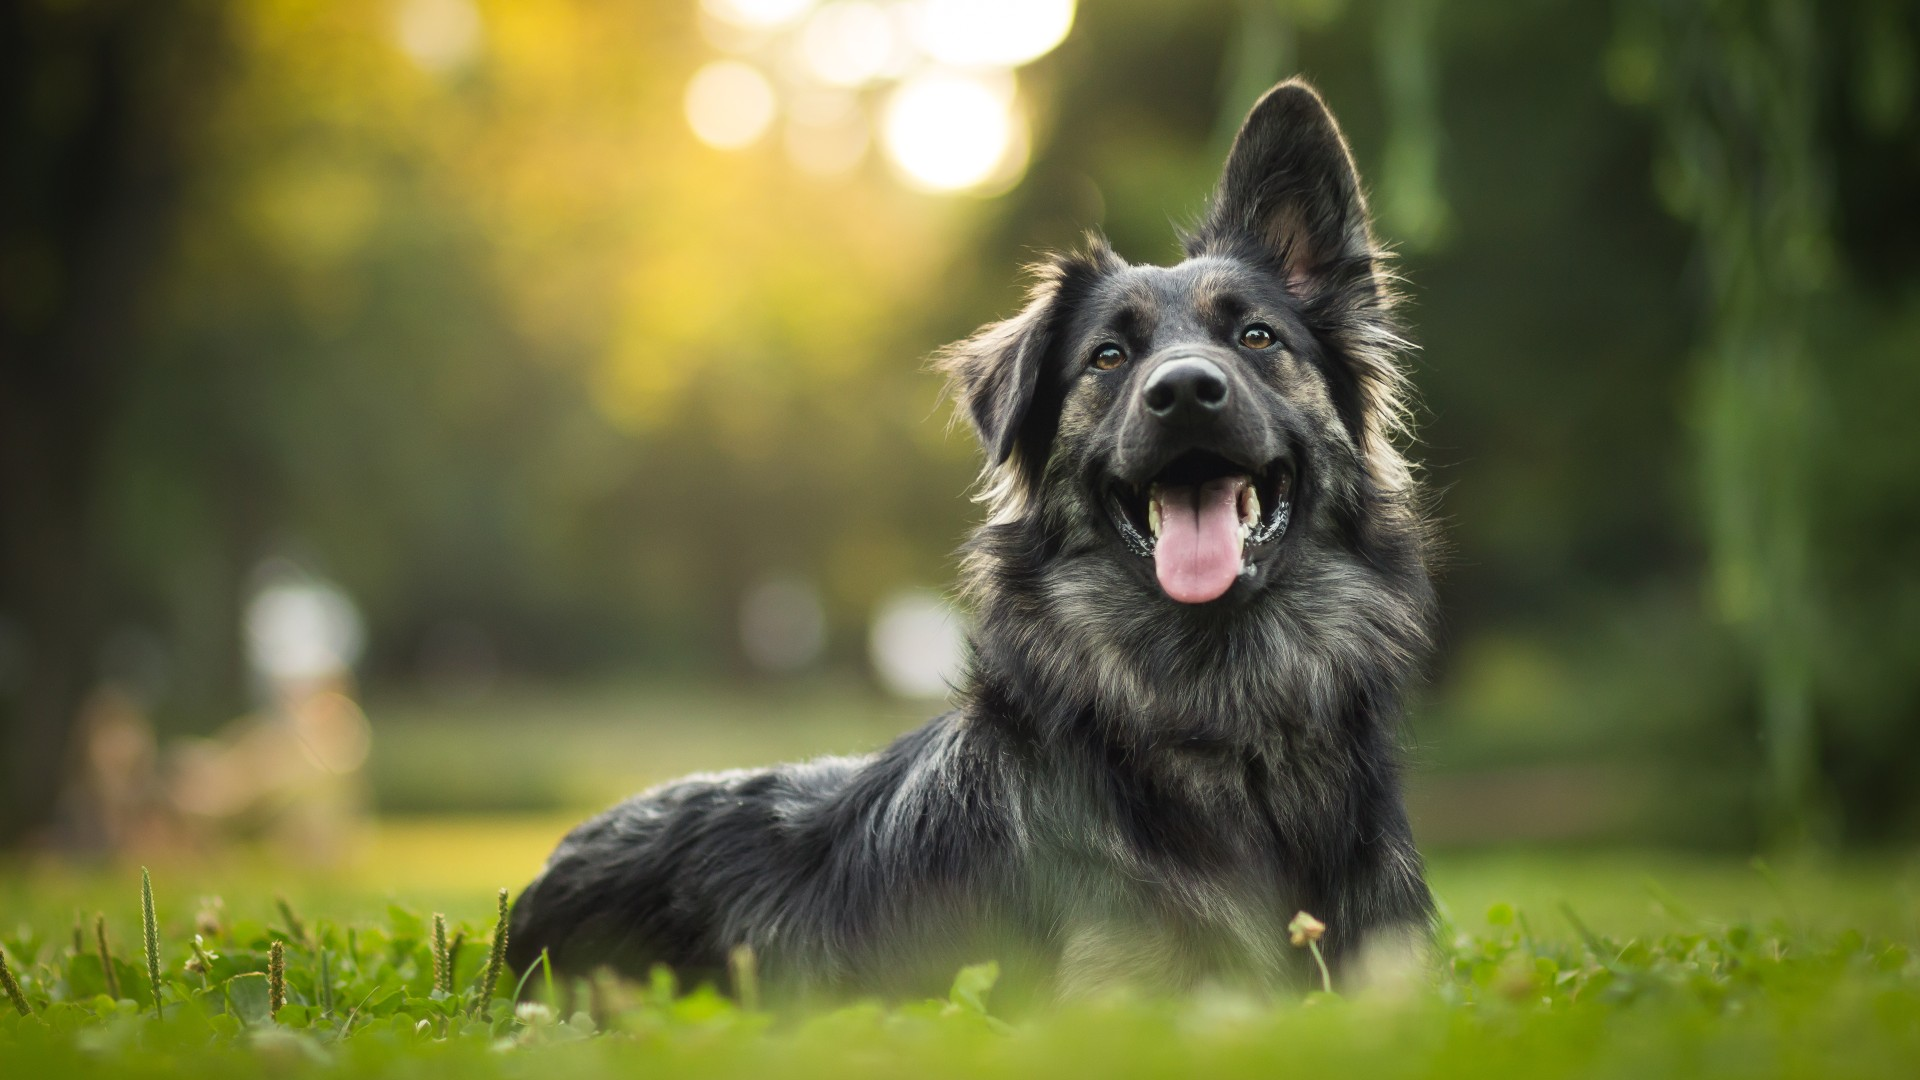

1/1 [==============================] - 0s 80ms/step
1
The image represents a Dog


In [54]:
input_image_path = input('Path of the image to be predicted: ')

input_image = cv2.imread(input_image_path)

cv2_imshow(input_image)

input_image_resize = cv2.resize(input_image, (224,224))

input_image_scaled = input_image_resize/255

image_reshaped = np.reshape(input_image_scaled, [1,224,224,3])

input_prediction = model.predict(image_reshaped)

input_pred_label = np.argmax(input_prediction)

print(input_pred_label)

if input_pred_label == 0:
  print('The image represents a Cat')

else:
  print('The image represents a Dog')

Path of the image to be predicted: /content/cat1.jpeg


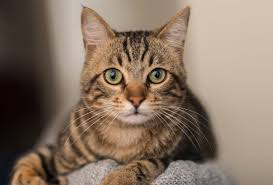

1/1 [==============================] - 0s 54ms/step
0
The image represents a Cat


In [55]:
input_image_path = input('Path of the image to be predicted: ')

input_image = cv2.imread(input_image_path)

cv2_imshow(input_image)

input_image_resize = cv2.resize(input_image, (224,224))

input_image_scaled = input_image_resize/255

image_reshaped = np.reshape(input_image_scaled, [1,224,224,3])

input_prediction = model.predict(image_reshaped)

input_pred_label = np.argmax(input_prediction)

print(input_pred_label)

if input_pred_label == 0:
  print('The image represents a Cat')

else:
  print('The image represents a Dog')